In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('data.csv', header=None, skiprows=1,usecols=[4, 6, 7])
df.columns = ['temperature_diff_2m_25m', 'hour_of_day', 'day']
df.head()
print(df.head())
np.round(df.describe(),2)


   temperature_diff_2m_25m  hour_of_day  day
0                     -0.1           20  600
1                     -0.3           14  196
2                     -0.1            4  513
3                      1.2           23  143
4                     -0.1           11  115


,temperature_diff_2m_25m,hour_of_day,day
count,500.00,500.00,500.00
mean,0.15,12.38,310.47
std,1.07,6.80,200.98
min,-5.40,1.00,32.00
25%,-0.20,6.00,118.75
50%,0.00,12.50,212.00
75%,0.60,18.00,513.00
max,4.30,24.00,608.00


C:\Users\Abdullah\AppData\Local\Temp\ipykernel_21592\2721682096.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['hour_of_day'].astype(float), shade=True)


<Axes: xlabel='hour_of_day', ylabel='Density'>

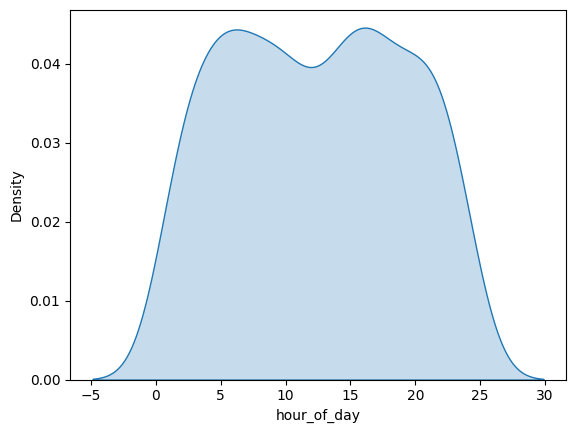

In [30]:
sns.kdeplot(df['hour_of_day'].astype(float), shade=True)

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_21592\2485727855.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['day'].astype(float), shade=True)


<Axes: xlabel='day', ylabel='Density'>

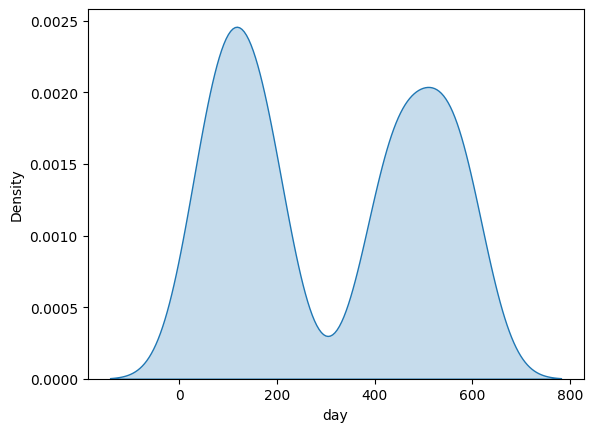

In [31]:
sns.kdeplot(df['day'].astype(float), shade=True)

<Axes: xlabel='hour_of_day', ylabel='day'>

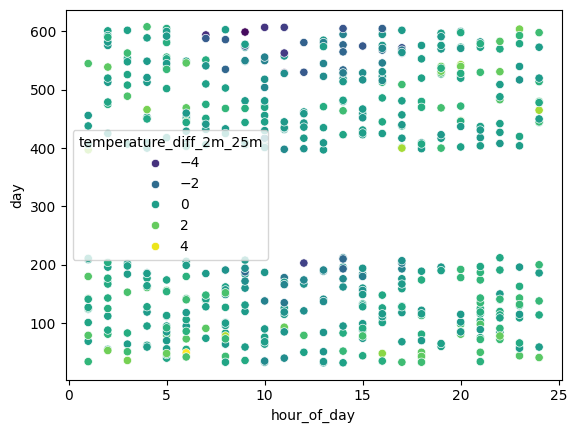

In [32]:
cmap = 'viridis'
sns.scatterplot(x='hour_of_day', y='day', hue='temperature_diff_2m_25m', palette=cmap, data=df)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['hour_of_day', 'day']], df['temperature_diff_2m_25m'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((350, 2), (150, 2))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)
x_train_sclaed = pd.DataFrame(x_train_scaled, columns=X_train.columns)
# np.round(x_train_scaled.describe(),1)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

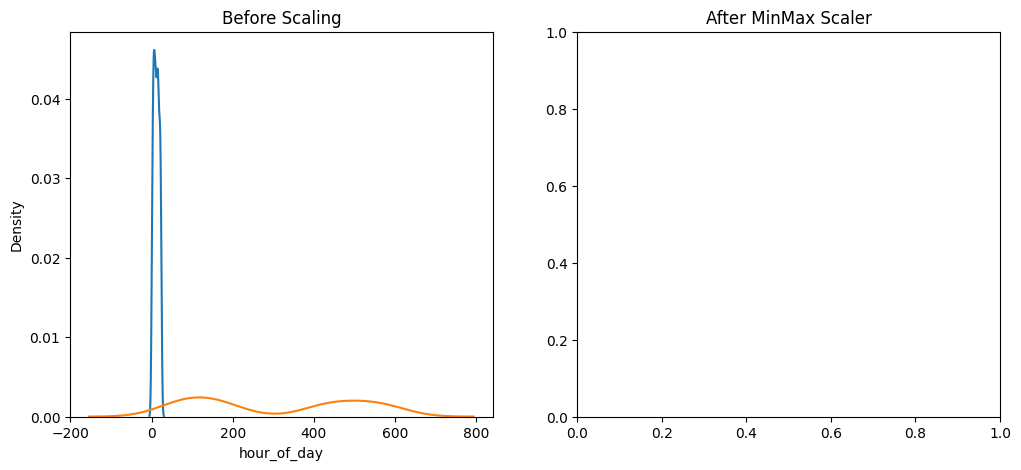

In [38]:
fig, (ax1 ,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['hour_of_day'].astype(float), ax=ax1)
sns.kdeplot(X_train['day'].astype(float), ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(x_train_scaled['hour_of_day'], ax=ax2)
sns.kdeplot(x_train_scaled['day'].astype(float), ax=ax2)
